# Machine Learning to find Doctor fee Consultation

In [82]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the train data
Doc_train=pd.read_excel("C:/Users/Subhajit Roy/Desktop/Final_Train.xlsx")
Doc_test=pd.read_excel("C:/Users/Subhajit Roy/Desktop/Final_Test.xlsx")

In [3]:
print(Doc_train.shape)
print(Doc_test.shape)

(5961, 7)
(1987, 6)


In [4]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
Doc_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
Doc_train.info(), 
print("-------------------------------------------------------------"),
Doc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3

In [7]:
op=lambda x: len(x.split(','))

In [8]:
# Train set
df_train = Doc_train.Qualification.apply(op)
# Test set
df_test = Doc_test.Qualification.apply(op)

In [9]:
df_train,df_test

(0       2
 1       2
 2       2
 3       2
 4       1
        ..
 5956    2
 5957    1
 5958    1
 5959    2
 5960    2
 Name: Qualification, Length: 5961, dtype: int64,
 0       1
 1       2
 2       2
 3       1
 4       2
        ..
 1982    2
 1983    3
 1984    2
 1985    1
 1986    3
 Name: Qualification, Length: 1987, dtype: int64)

In [10]:
sorted(Doc_test.Qualification[Doc_test.Qualification.apply(op).idxmax()].split(","))

[' Advanced Endotontic Course On Root Canal',
 ' Advanced Retreatment Course in RCT',
 ' Certificate in Cosmetic Dentistry',
 ' Certification in Prosthodontics & Periodontology',
 ' Certified Advanced Course in Wisdom Tooth Extraction',
 ' Certified Course in Oral Surgery',
 ' Diploma in Cosmetic Dentistry',
 ' Endodontics and Aesthetic Dentistry',
 ' Fellow of Academy of General Education (FAGE)',
 ' Fellowship In Clinical Cosmetology',
 ' Fellowship in Aesthetic Dentistry (FAD)',
 ' MBA - Hospital Management',
 ' MIDA',
 ' PG Diploma In Clinical Cosmetology (PGDCC)',
 ' PG Diploma in Conservative',
 ' Post Graduate Certificate in Endodontics (PGCE)',
 'BDS']

In [11]:
# Define function to remove inconsistencies in the data
import re
def sortQual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [12]:
# Apply the function on the Qualification set

# Train Set
Doc_train.Qualification = Doc_train.Qualification.apply(lambda x: sortQual(x))

# Test Set
Doc_test.Qualification = Doc_test.Qualification.apply(lambda x: sortQual(x))

In [13]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [14]:
# List of top 10 unique Qualifications along with there occurence in Train Set
from collections import Counter
def doc(series):
    text = ''
    for i in series:
        text += i + ','
    return text


text = doc(Doc_train.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,2808
1,bds,1363
2,bams,764
3,bhms,749
4,md-dermatology,606
5,ms-ent,411
6,venereology&leprosy,297
7,md-generalmedicine,285
8,diplomainotorhinolaryngology(dlo),250
9,md-homeopathy,181


In [15]:
# List of top 10 unique Qualifications along with there occurence in Test Set

text = doc(Doc_test.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,980
1,bds,428
2,bhms,249
3,bams,243
4,md-dermatology,196
5,ms-ent,128
6,md-generalmedicine,99
7,venereology&leprosy,91
8,diplomainotorhinolaryngology(dlo),85
9,ddvl,67


In [16]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
Doc_train["Qualification"] = le_x.fit_transform(Doc_train["Qualification"])
Doc_test["Qualification"] = le_x.fit_transform(Doc_test["Qualification"])


In [17]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,497,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,125,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1238,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,44,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,39,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [18]:
Doc_test["Qualification"].value_counts()

17     153
155    150
69     144
487    107
533     70
      ... 
355      1
356      1
359      1
360      1
0        1
Name: Qualification, Length: 571, dtype: int64

In [19]:
Doc_train["Experience"].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
58 years experience      1
64 years experience      1
65 years experience      1
61 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64

In [20]:
# Train set
Doc_train['Experience'] = Doc_train['Experience'].str.slice(stop=2).astype(int)

# Test set
Doc_test['Experience'] = Doc_test['Experience'].str.slice(stop=2).astype(int)

In [21]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,497,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,125,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1238,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,44,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,39,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [22]:
Doc_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [23]:
Doc_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [24]:
Doc_train['Rating'].fillna('0%',inplace=True)
Doc_test['Rating'].fillna('0%',inplace=True)

In [25]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,497,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,125,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1238,9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,44,12,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,39,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [26]:
Doc_train['Rating'] = Doc_train['Rating'].str.replace('%','')

In [27]:
Doc_test['Rating'] = Doc_test['Rating'].str.replace('%','')

In [28]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,497,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,125,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1238,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,44,12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,39,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [29]:
# Train Set
Doc_train['City'] = Doc_train['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
Doc_train['Locality'] = Doc_train['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])


# Test Set
Doc_test['City'] = Doc_test['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
Doc_test['Locality'] = Doc_test['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])

In [30]:
Doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality
0,497,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,125,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,1238,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,44,12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,39,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [31]:
Doc_train.drop(["Place"], axis = 1, inplace = True)
Doc_test.drop(["Place"], axis = 1, inplace = True)

In [32]:
Doc_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Locality
0,497,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,125,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,1238,9,0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,44,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,39,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [33]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
Doc_train["City"] = le_x.fit_transform(Doc_train["City"])
Doc_test["City"] = le_x.fit_transform(Doc_test["City"])
#--------------------------------------------------------------------------------------
Doc_train["Locality"] = le_x.fit_transform(Doc_train["Locality"])
Doc_test["Locality"] = le_x.fit_transform(Doc_test["Locality"])

In [34]:
Doc_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Locality
0,497,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,4,297
1,125,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,856
2,1238,9,0,ENT Specialist,NaN,300,0,453
3,44,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,68
4,39,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,336


In [35]:
Doc_train["Profile"] = le_x.fit_transform(Doc_train["Profile"])
Doc_test["Profile"] = le_x.fit_transform(Doc_test["Profile"])

In [36]:
Doc_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Locality
0,497,24,100,5,"100% 16 Feedback Kakkanad, Ernakulam",100,4,297
1,125,12,98,0,"98% 76 Feedback Whitefield, Bangalore",350,0,856
2,1238,9,0,3,NaN,300,0,453
3,44,12,0,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,68
4,39,20,100,0,"100% 4 Feedback Keelkattalai, Chennai",250,1,336


In [37]:
# Define function to return the Feedback numbers

def feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [38]:
# Fetch out the feedback numbers in different records. 

# Train set
Doc_train['feedack_num'] = Doc_train.Miscellaneous_Info.apply(lambda x: feedback(x) if '%' in str(x) else 0)

# Test set
Doc_test['feedack_num'] = Doc_test.Miscellaneous_Info.apply(lambda x: feedback(x) if '%' in str(x) else 0)

In [39]:
Doc_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Locality,feedack_num
0,497,24,100,5,"100% 16 Feedback Kakkanad, Ernakulam",100,4,297,16
1,125,12,98,0,"98% 76 Feedback Whitefield, Bangalore",350,0,856,76
2,1238,9,0,3,NaN,300,0,453,0
3,44,12,0,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,68,0
4,39,20,100,0,"100% 4 Feedback Keelkattalai, Chennai",250,1,336,4


In [40]:
Doc_train.drop(["Miscellaneous_Info"], axis = 1, inplace = True)
Doc_test.drop(["Miscellaneous_Info"], axis = 1, inplace = True)

In [41]:
Doc_train.head()

,Qualification,Experience,Rating,Profile,Fees,City,Locality,feedack_num
0,497,24,100,5,100,4,297,16
1,125,12,98,0,350,0,856,76
2,1238,9,0,3,300,0,453,0
3,44,12,0,0,250,0,68,0
4,39,20,100,0,250,1,336,4


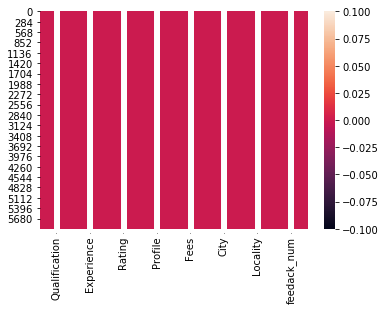

In [42]:
#visualizing the null values through heatmap
sns.heatmap(Doc_train.isnull(),annot=True)

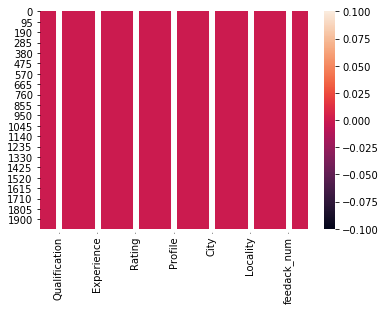

In [43]:
#visualizing the null values through heatmap
sns.heatmap(Doc_test.isnull(),annot=True)

In [44]:
Doc_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Fees', 'City',
       'Locality', 'feedack_num'],
      dtype='object')

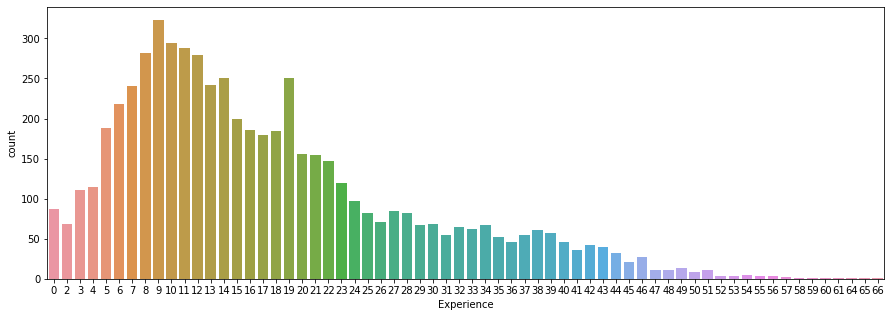

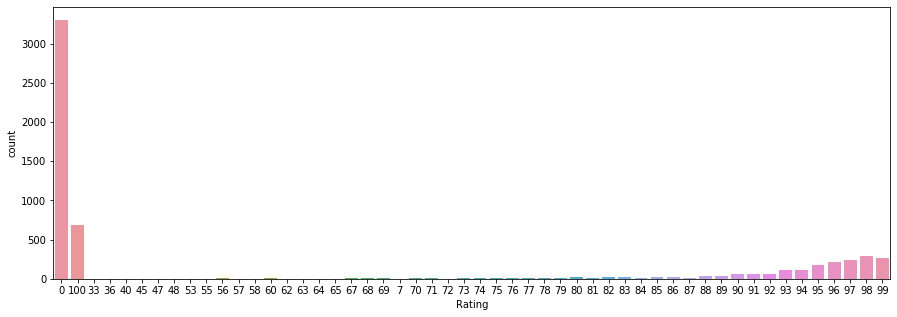

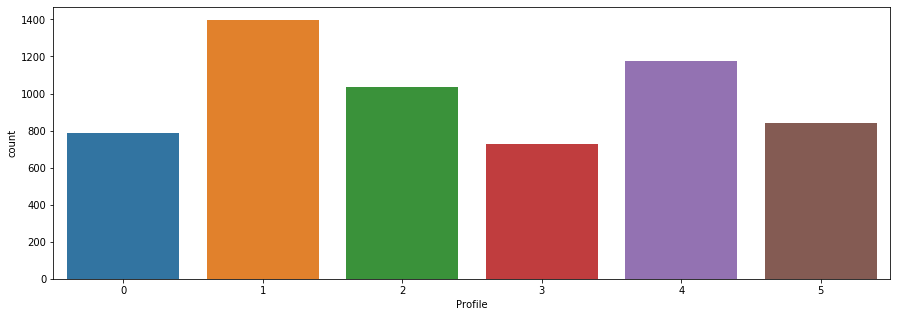

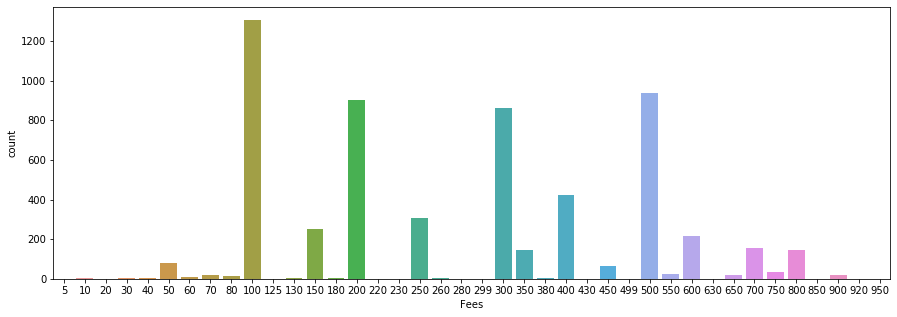

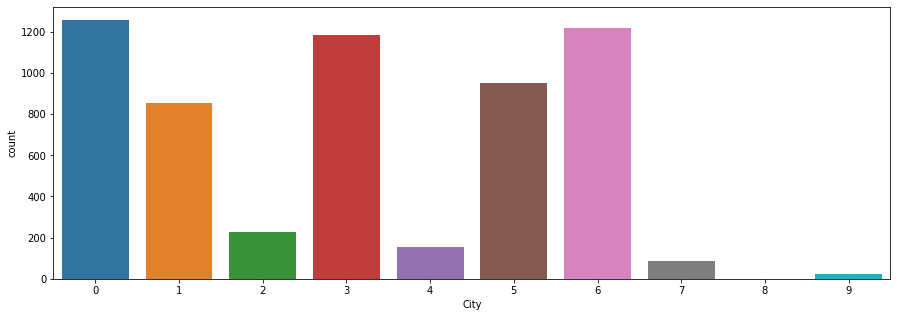

In [45]:
#printing different countplot
data_columns=['Experience', 'Rating', 'Profile', 'Fees', 'City']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(15,5))
    sns.countplot(data=Doc_train,x=data_columns[i])

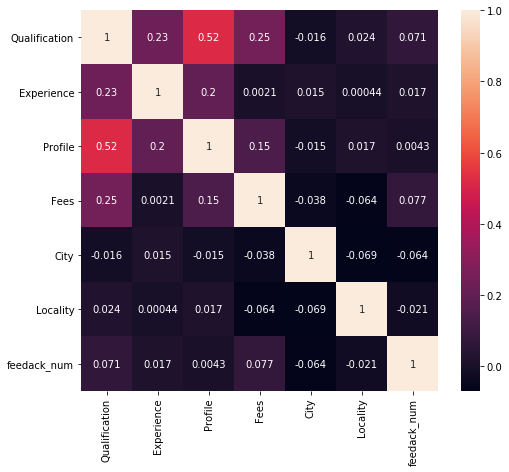

In [46]:
#checking for the correlation
corr_hmap=Doc_train.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

In [47]:
#Now separating input and output variable
#Predicting
x=Doc_train.drop(['Fees'],axis=1)
y=Doc_train['Fees']
print(x.shape)
print(y.shape)

(5961, 7)
(5961,)


In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [49]:
print(selection.feature_importances_)

[0.20337334 0.2152955  0.0895633  0.08198751 0.12548484 0.23244156
 0.05185396]


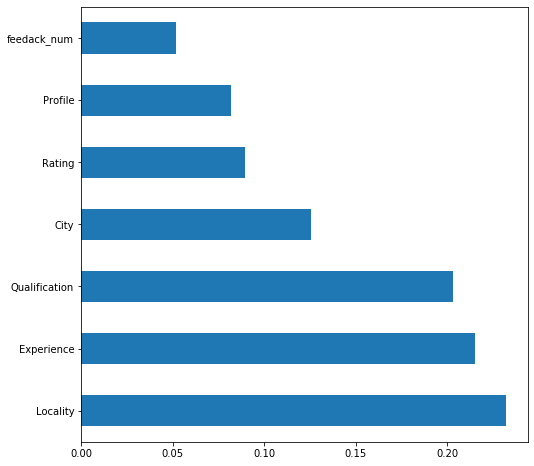

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (8,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred = reg_rf.predict(x_test)

In [54]:
reg_rf.score(x_train, y_train)

0.8840382010351403

In [55]:
reg_rf.score(x_test, y_test)

0.16741198959243275

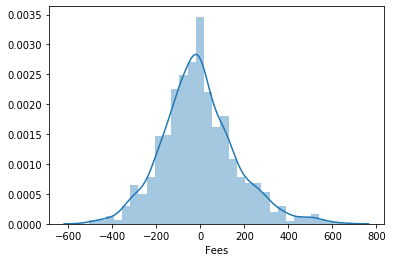

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

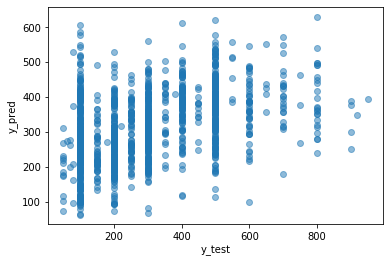

In [57]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 128.64063704945517
MSE: 28679.80264067377
RMSE: 169.35112234843254


In [60]:
metrics.r2_score(y_test, y_pred)

0.16741198959243275

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [66]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [67]:
prediction = rf_random.predict(x_test)

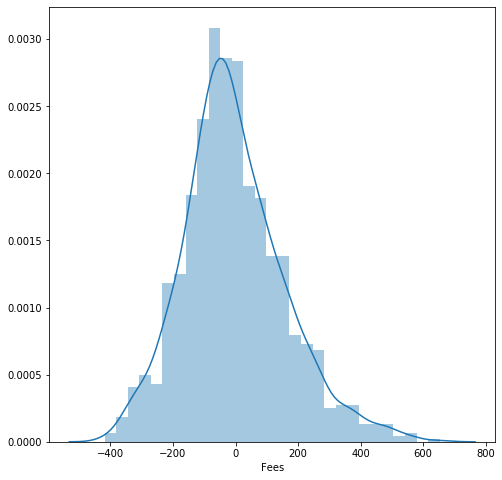

In [68]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

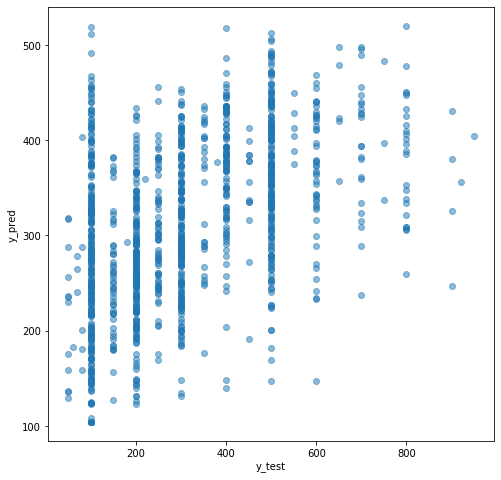

In [69]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 126.39074663080173
MSE: 26713.406405588194
RMSE: 163.44236417033434


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [75, 100],'max_depth':[20, 30]}]
forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [80]:
from sklearn.metrics import r2_score
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(x_test)
    print(r2_score(y_true, y_pred))
    print()

-30810.607 (+/-1467.657) for {'max_depth': 20, 'n_estimators': 75}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.17364395302322067

-30658.310 (+/-1205.607) for {'max_depth': 20, 'n_estimators': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.17364395302322067

-30851.956 (+/-877.394) for {'max_depth': 30, 'n_estimators': 75}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.17364395302322067

-30756.620 (+/-1523.886) for {'max_depth': 30, 'n_estimators': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.17364395302322067



In [74]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [93]:
#saving the model as pickle in a file
pickle.dump(rf_random,open('doctor_data.pkl','wb'))

In [94]:
#loading the model for testing
loaded_model=pickle.load(open('doctor_data.pkl','rb'))
loaded_model.predict(x_test)

array([283.19833229, 321.58484731, 265.63143238, 265.63143238,
       283.19833229, 284.11105566, 274.42831625, 324.46757518,
       265.63143238, 262.99836004, 264.82548   , 262.99836004,
       279.49224098, 291.73799934, 262.99836004, 262.99836004,
       265.63143238, 284.11105566, 264.82548   , 274.42831625,
       265.63143238, 264.82548   , 284.11105566, 265.63143238,
       274.42831625, 321.58484731, 265.63143238, 265.63143238,
       262.99836004, 265.63143238, 264.82548   , 302.82835772,
       262.99836004, 326.41421895, 302.82835772, 324.46757518,
       354.6142625 , 274.42831625, 265.63143238, 274.42831625,
       262.99836004, 265.63143238, 262.99836004, 262.99836004,
       302.82835772, 265.63143238, 265.63143238, 262.99836004,
       288.99611532, 321.62271842, 283.30510328, 265.63143238,
       283.19833229, 283.19833229, 274.42831625, 302.82835772,
       265.63143238, 273.42236387, 262.99836004, 264.82548   ,
       274.42831625, 321.58484731, 262.99836004, 284.11